<div class="alert alert-block alert-dark">

## <center> Group Project - ABCDEATS Customer Segmentation </center> <br>
#  <center> <b> K-Means </center> <br>
## <center> Master Data Science and Advanced Analytics <center>
## <center> Fall Semester 2024-2025 <center>
<br>
<center> Group 36: <center> <br>
<center>Eduardo Mendes, 20240850  <br><center>
<center>Joana Esteves, 20240746 <br><center>
<center>João Afonso Freire, 20240528 <br><center>
<center>Tomás Figueiredo, 20240941  <br><center>

<div>


**Table of Contents:**

- [1. Imports](#imports)

    - [1.1. Import the needed Libraries](#importlibraries)

    - [1.2. Import Dataset](#importdataset)

- [2. KMeans Clustering](#kmeans)

    - [2.1. PCA and visualizations](#pcavis)


<a class="anchor" id="imports">

# **1. Imports**

</a>


<a class="anchor" id="importlibraries">

## 1.1. Import the needed Libraries

</a>
    


In [53]:
import pandas as pd
import numpy as np
import os

# Clustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation

import warnings

In [54]:
# Disable warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="importlibraries">

## 1.2. Import Dataset

</a>

In [55]:
df_preprocessed = pd.read_parquet("Data_preprocessed.parquet")

In [56]:
df_preprocessed.head()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,cuisine_diversity,vendor_loyalty,customer_region,last_promo,payment_method,age_group,use_promo,weekend_preference,meal_time_preference,cuisine_preference
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,-1.349452,-0.389077,0.040521,-0.512036,-1.206775,-2.662974,-0.460767,-0.478193,-0.314716,-0.159471,...,-0.870187,0.673444,2360,DELIVERY,DIGI,young,True,True,dinner,CUI_Indian
5d272b9dcb,-1.491482,-0.389077,-0.625394,-0.164197,-1.206775,-2.662974,0.889569,-0.138681,-0.314716,-0.159471,...,-0.148134,0.673444,8670,DISCOUNT,DIGI,young,True,True,breakfast,CUI_American
f6d1b2ba63,1.491139,-0.824297,-0.625394,-0.164197,-1.206775,-2.662974,0.508273,-0.478193,-0.314716,-0.159471,...,-0.870187,-1.623501,4660,DISCOUNT,CASH,adult,True,True,breakfast,CUI_American
180c632ed8,0.070843,-0.389077,-0.403423,-0.512036,-1.206775,-2.619989,-0.460767,0.249713,-0.314716,-0.159471,...,-0.148134,0.673444,4660,DELIVERY,DIGI,adult,True,False,lunch,CUI_Indian
4eb37a6705,-1.065393,-0.389077,0.040521,-0.859876,-1.206775,-2.619989,1.073897,1.693303,-0.314716,-0.159471,...,-0.148134,0.673444,4660,No Promo Code,DIGI,young,False,False,breakfast,CUI_Asian


<a class="anchor" id="kmeans">

# **2. KMeans Clustering**

</a>

Let's start by defining the features to study:


In [57]:
features = ["total_orders", 'avg_spent_per_order', 'vendor_loyalty', "order_frequency"]

We are going to fix a number of cluster first:

In [58]:
kmclust = KMeans(n_clusters=3, init='random', n_init=10, random_state=27)

In [59]:
kmclust.fit(df_preprocessed[features])

KMeans(init='random', n_clusters=3, n_init=10, random_state=27)

In [60]:
kmclust.predict(df_preprocessed[features])

array([2, 2, 0, ..., 2, 2, 2])

In [61]:
# The transform method
pd.DataFrame(kmclust.transform(df_preprocessed[features]))

,0,1,2
0,3.209529,2.214091,0.284536
1,3.079003,2.138615,0.594783
2,2.498819,3.168671,2.568005
3,2.837415,1.558088,0.947929
4,3.782237,2.732456,2.110040
...,...,...,...
30206,3.508521,2.447365,0.610152
30207,3.508521,2.447365,0.610152
30208,3.494804,2.432898,0.576865
30209,3.260437,2.218617,0.228942


In [62]:
# Different initialization method and provide more n_init
kmclust2 = KMeans(n_clusters=5, init='k-means++', n_init=15, random_state=27)
kmclust2.fit(df_preprocessed[features])

KMeans(n_clusters=5, n_init=15, random_state=27)

In [63]:
kmclust2.predict(df_preprocessed[features])

array([2, 2, 0, ..., 2, 2, 2])

In [64]:
range_clusters = range(1, 11)

In [65]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_preprocessed[features])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

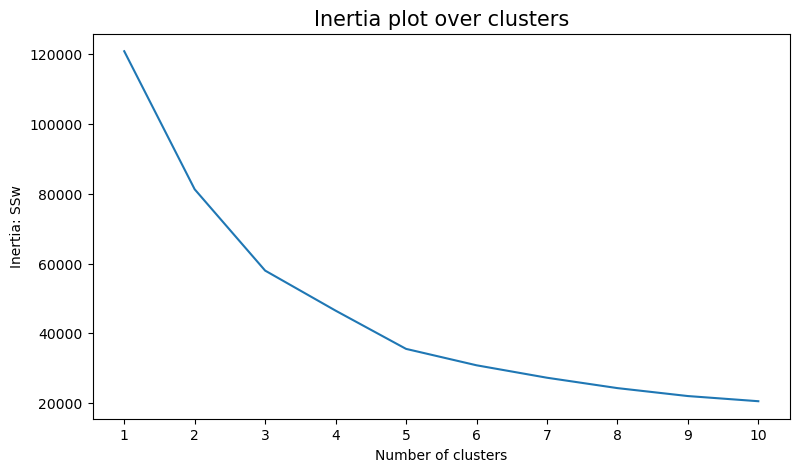

In [66]:
# The inertia plot

fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

For n_clusters = 2, the average silhouette_score is : 0.39531896232669655
For n_clusters = 3, the average silhouette_score is : 0.379981632409771
For n_clusters = 4, the average silhouette_score is : 0.40580394361998495
For n_clusters = 5, the average silhouette_score is : 0.4305172005827327
For n_clusters = 6, the average silhouette_score is : 0.4148458189196749
For n_clusters = 7, the average silhouette_score is : 0.40291641779631415
For n_clusters = 8, the average silhouette_score is : 0.4010185750074567
For n_clusters = 9, the average silhouette_score is : 0.4001614706348059
For n_clusters = 10, the average silhouette_score is : 0.36352994306927705


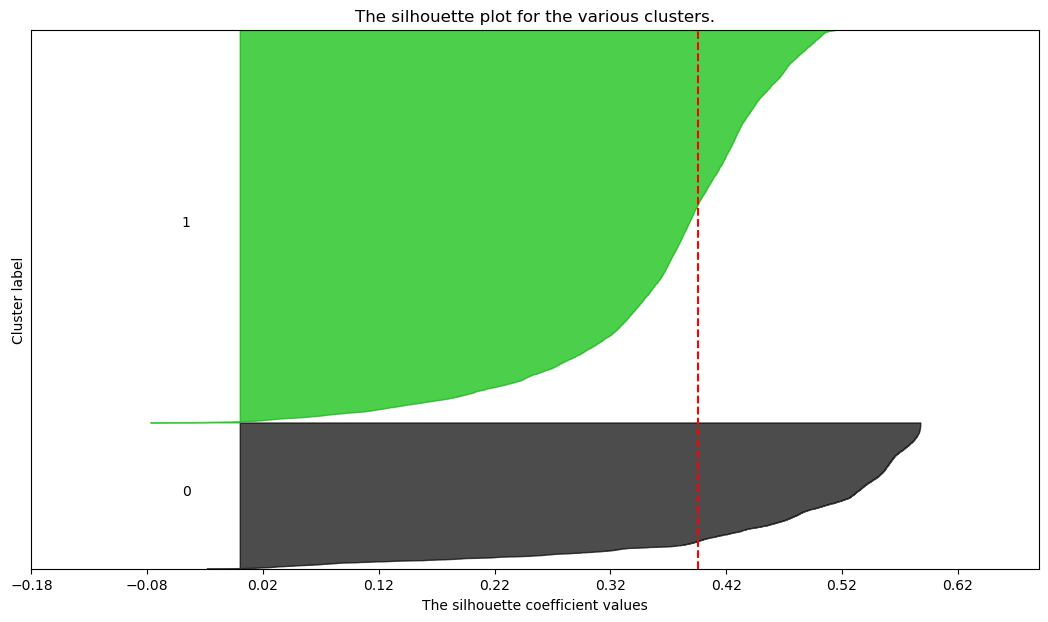

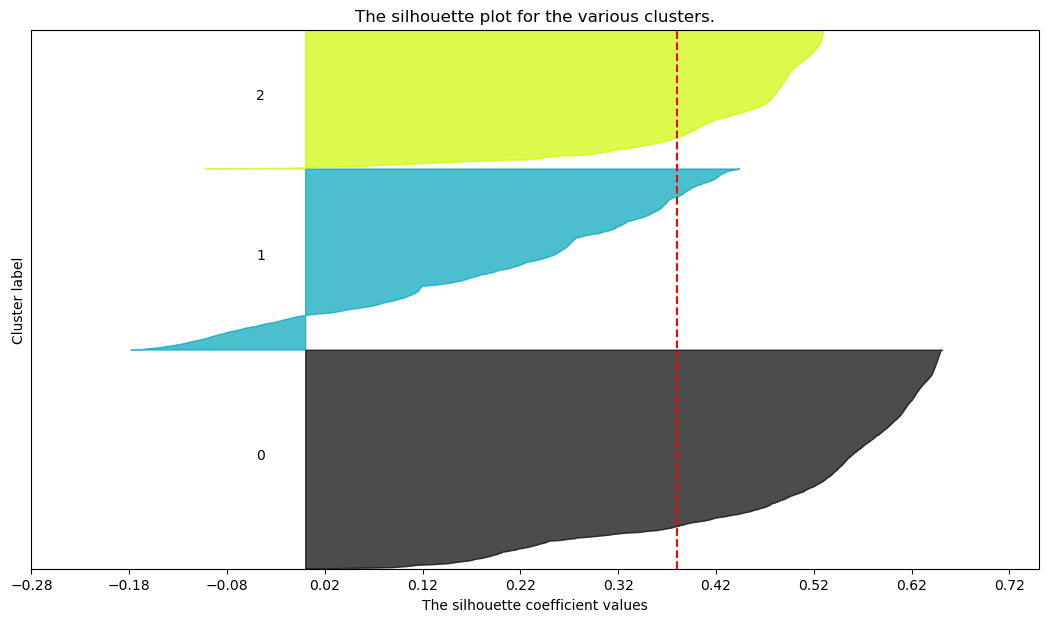

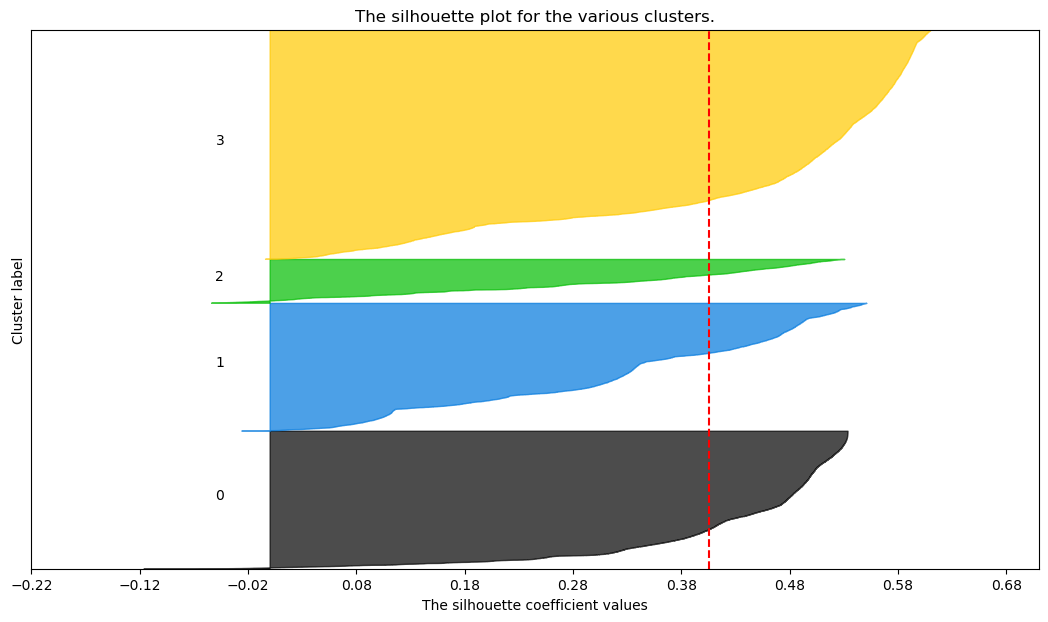

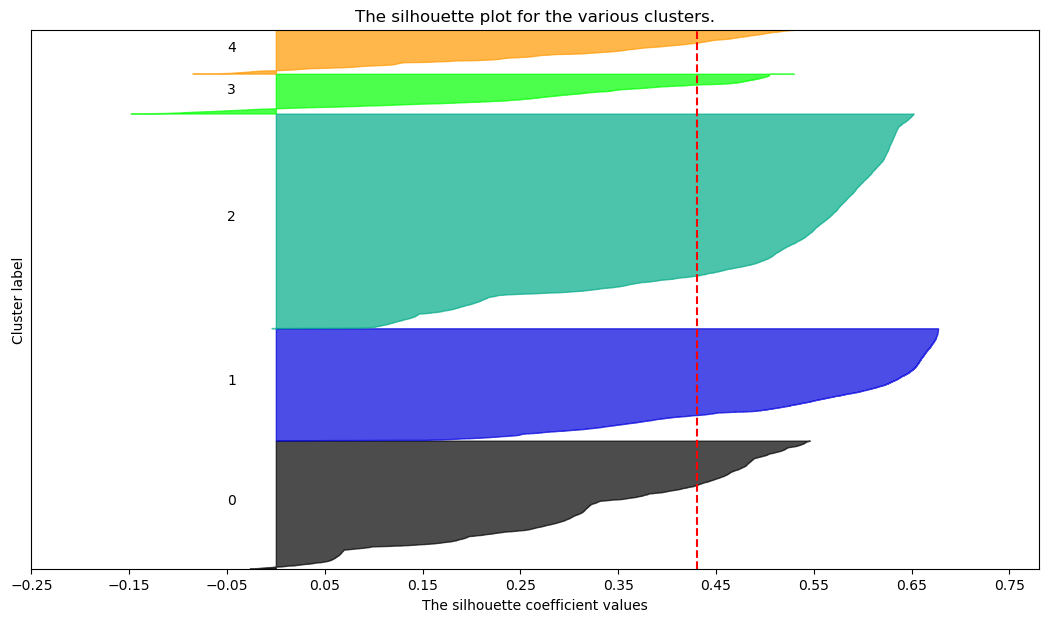

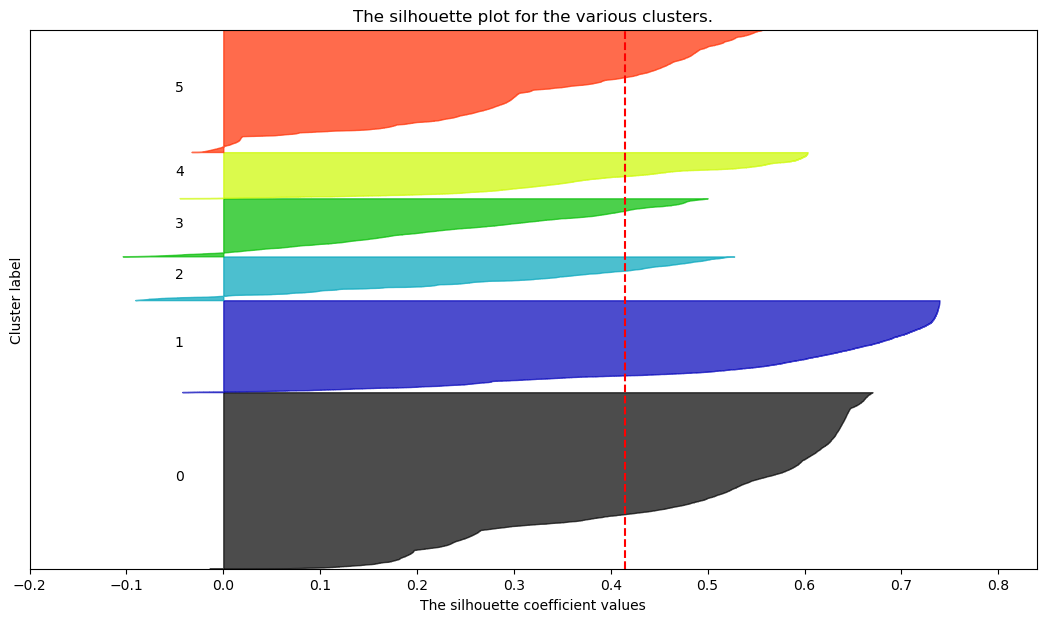

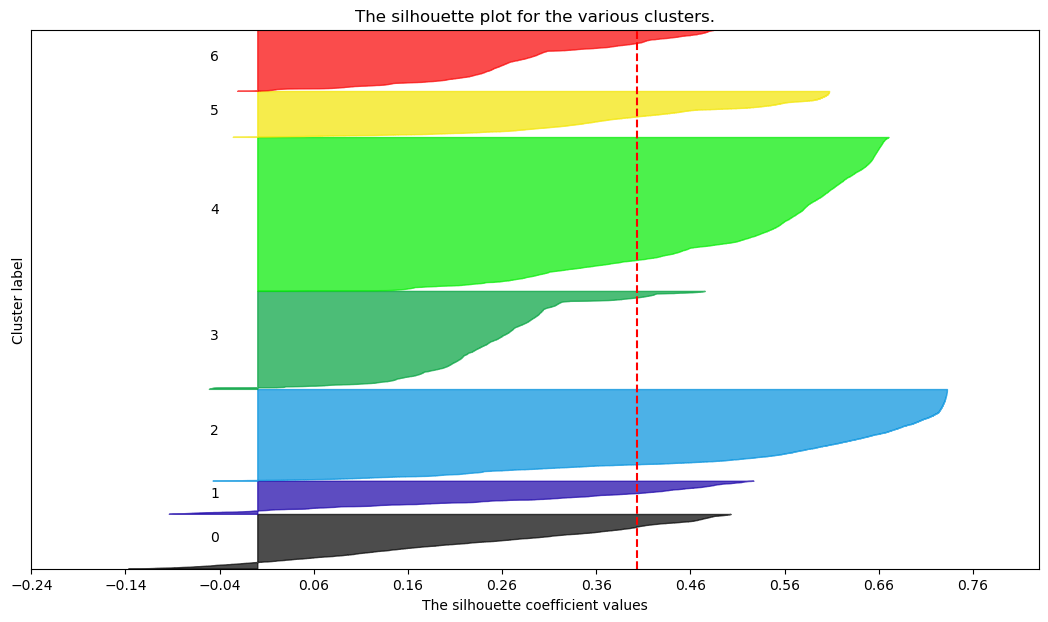

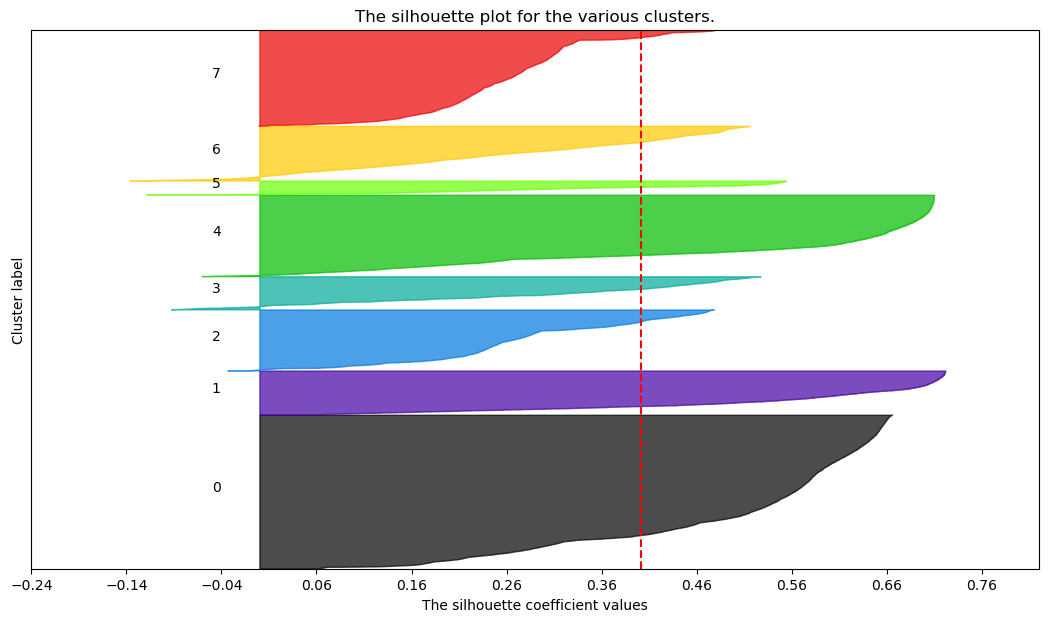

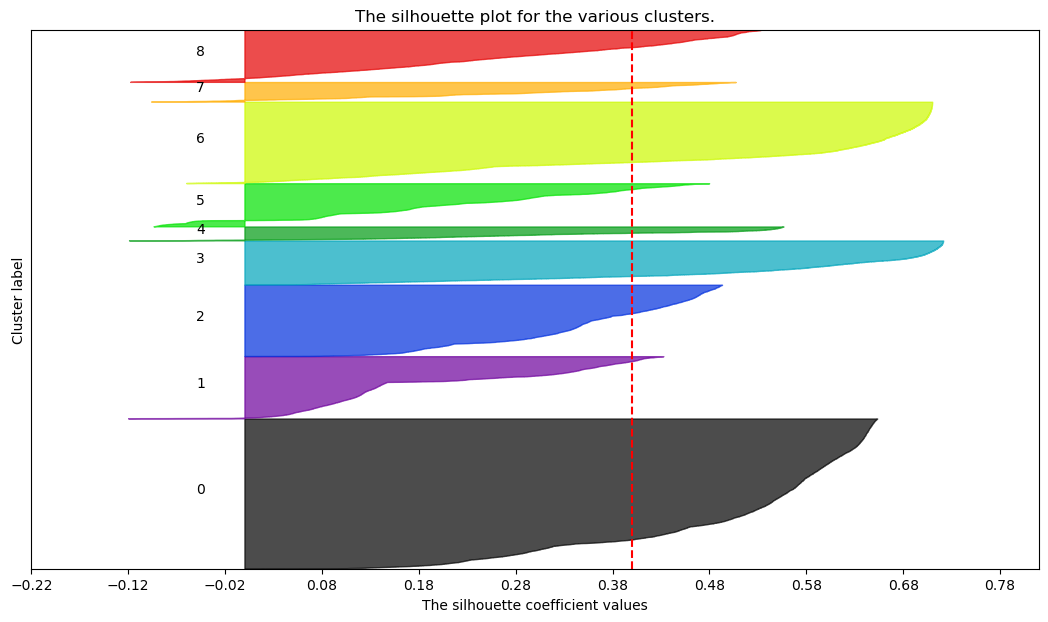

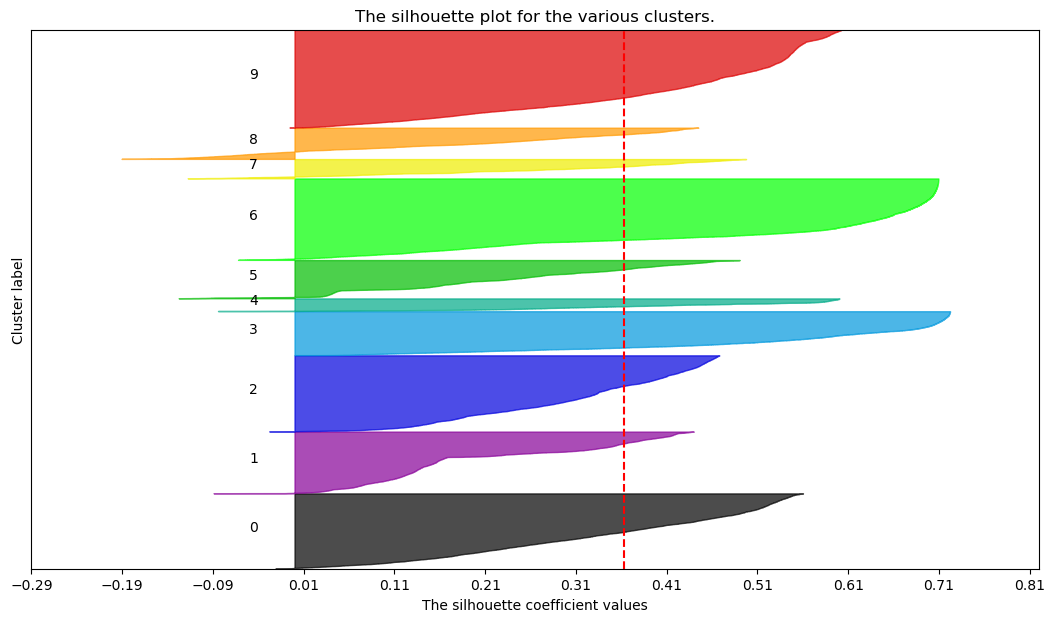

In [67]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_preprocessed[features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_preprocessed[features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_preprocessed[features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_preprocessed[features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

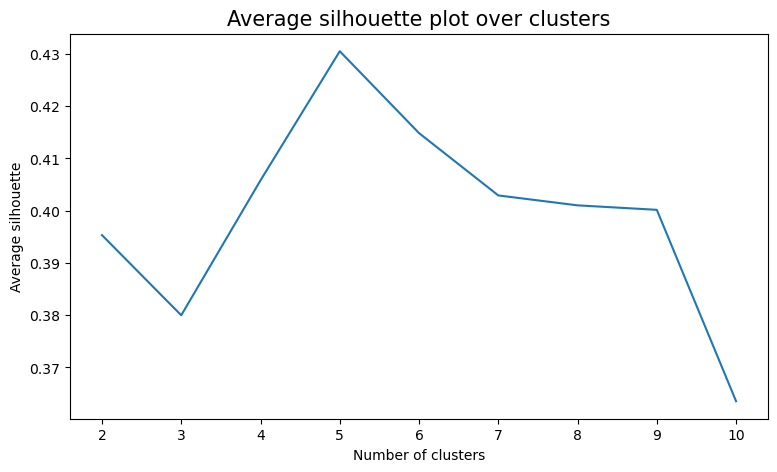

In [68]:
# The average silhouette plot
plt.figure(figsize=(9,5))

plt.plot(range_clusters[1:], 
         avg_silhouette)     

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

Final Solution:

In [69]:
number_clusters = 5
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=27)
km_labels = kmclust.fit_predict(df_preprocessed[features])
km_labels

array([2, 2, 0, ..., 2, 2, 2])

In [70]:
silhouette = silhouette_score(df_preprocessed[features], km_labels)
print(f"Silhouette Score for K-means: {silhouette}")

Silhouette Score for K-means: 0.4305066742171047


Let's see if we have imbalanced clusters:

In [71]:
# Count unique observations in each cluster
unique, counts = np.unique(km_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Show results
print("Number of observations for each cluster - K-means")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} observations")

Number of observations for each cluster - K-means
Cluster 0: 7182 observations
Cluster 1: 2454 observations
Cluster 2: 6301 observations
Cluster 3: 2232 observations
Cluster 4: 12042 observations


Profilling

In [72]:
# Characterizing the final clusters
df_concat = pd.concat((df_preprocessed[features], pd.Series(km_labels, name='labels', index=df_preprocessed.index)), axis=1)
df_concat.groupby('labels').mean()

,total_orders,avg_spent_per_order,vendor_loyalty,order_frequency
labels,,,,
0,0.138891,-0.266644,-1.353849,-0.550192
1,2.628411,-0.473060,-1.005346,-0.414583
2,-0.763637,-0.048402,0.631972,1.620744
3,-0.595325,2.563114,0.561766,0.773003
4,-0.108553,-0.194317,0.577524,-0.578707


In [73]:
import pandas as pd
import numpy as np

# Assuming km_labels contains your cluster labels
# and df_preprocessed contains all your features

# Combine all features with cluster labels
df_concat = pd.concat([df_preprocessed, pd.Series(km_labels, name='labels', index=df_preprocessed.index)], axis=1)

# Function to calculate mean for numeric and mode for non-numeric
def agg_func(x):
    if pd.api.types.is_numeric_dtype(x):
        return x.mean()
    else:
        return x.mode().iloc[0] if not x.mode().empty else np.nan

# Calculate mean/mode of all features for each cluster
cluster_profiles = df_concat.groupby('labels').agg(agg_func)

# Display the cluster profiles
print(cluster_profiles)

# Optionally, if you want to see a transposed view for easier reading
print(cluster_profiles.T)



        customer_age  vendor_count  product_count  is_chain  first_order  \
labels                                                                     
0           0.017725     -0.226067       0.095133  0.048856    -0.234095   
1           0.007873      2.233591       2.533859  2.263878    -0.817424   
2          -0.006630     -0.760751      -0.763347 -0.598817     0.694277   
3           0.012237     -0.534735      -0.262105 -0.584815     0.484035   
4          -0.010975      0.176831      -0.125101 -0.068759    -0.146801   

        last_order  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  ...  \
labels                                                                ...   
0         0.249581      0.103066  -0.032614      -0.059081  0.020271  ...   
1         0.787759      0.745374   0.541276       0.388833  0.535613  ...   
2        -0.727087     -0.291571  -0.341041      -0.193350 -0.109888  ...   
3        -0.395274     -0.082136   0.564713       0.121104 -0.133098  ...   
4    

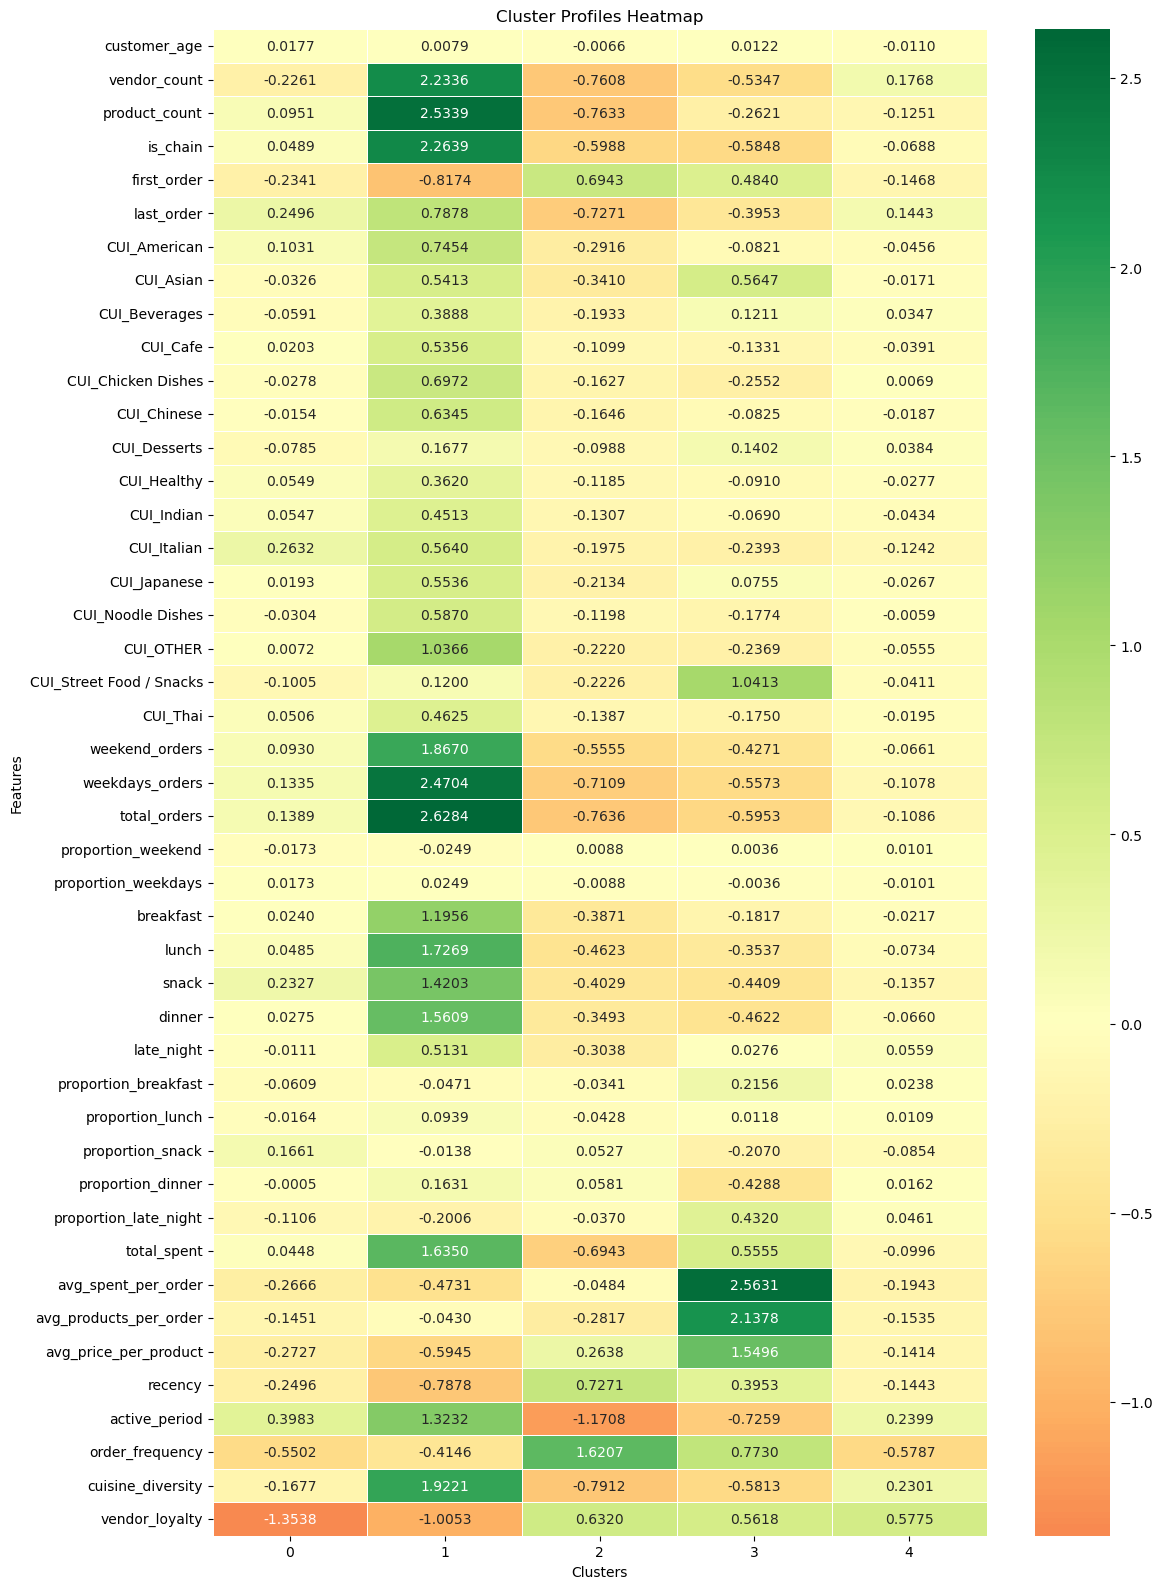

In [74]:
# Get only numeric columns from the DataFrame
numeric_columns = df_concat.select_dtypes(include=[np.number]).columns
cluster_profiles_numeric = df_concat[numeric_columns].groupby('labels').mean()

# Create the plot
plt.figure(figsize=(12, 16))

# Create heatmap with numeric data only
sns.heatmap(cluster_profiles_numeric.T, 
            cmap='RdYlGn',
            center=0,
            fmt='.4f',
            annot=True,
            cbar=True,
            linewidths=.5)

plt.title('Cluster Profiles Heatmap')
plt.ylabel('Features')
plt.xlabel('Clusters', loc='center')
plt.tight_layout()
plt.show()


<a class="anchor" id="pcavis">

## 2.1. PCA and visualizations

</a>

In [76]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed[features])

In [77]:
df_pca_with_labels = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca_with_labels["Cluster"] = km_labels

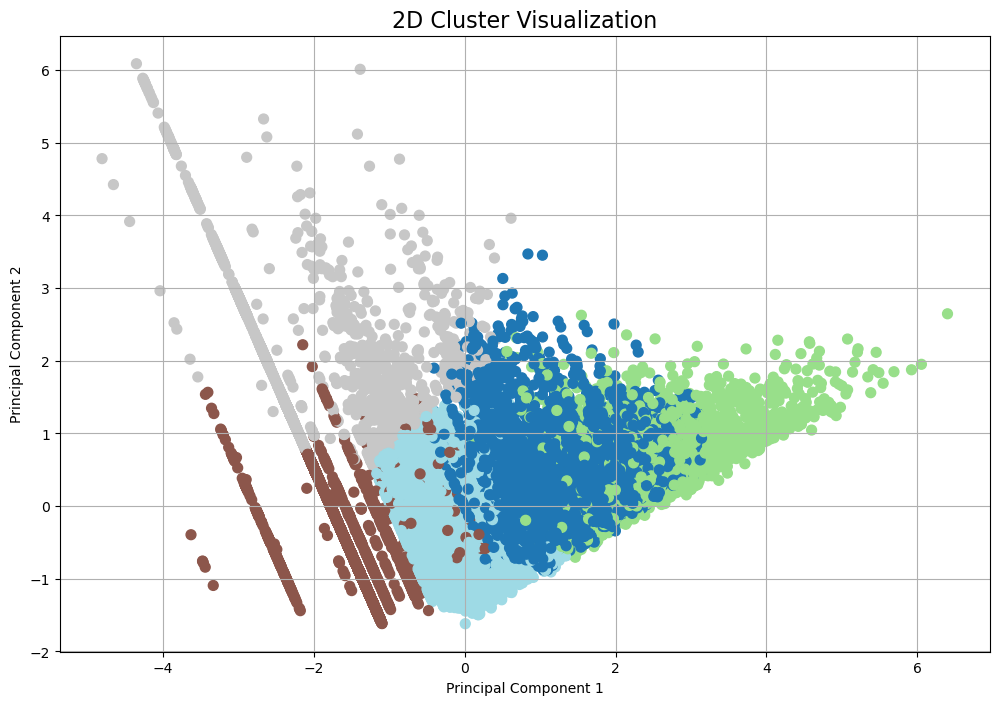

In [78]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_pca_with_labels["PC1"], 
    df_pca_with_labels["PC2"],
    c=df_pca_with_labels["Cluster"], 
    cmap="tab20", 
    s=50
)

plt.title("2D Cluster Visualization", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

plt.show()


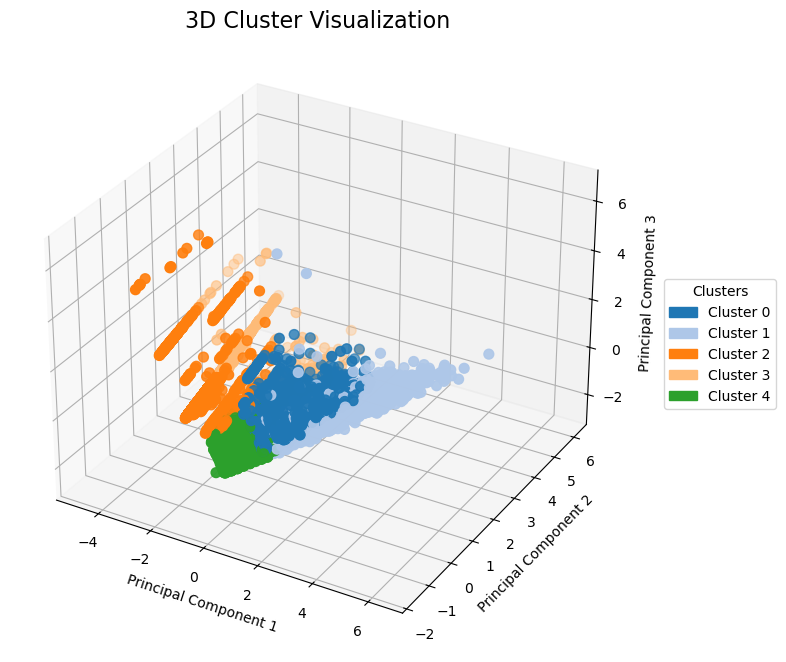

In [ ]:
# Perform PCA with 3 components
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_preprocessed[features])

# Create a DataFrame with the PCA results and cluster labels
df_pca_with_labels = pd.DataFrame(df_pca, columns=["PC1", "PC2", "PC3"])
df_pca_with_labels["Cluster"] = km_labels

unique_clusters = sorted(df_pca_with_labels["Cluster"].unique()) 
cluster_to_color = {cluster: plt.cm.tab20(i) for i, cluster in enumerate(unique_clusters)}

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_pca_with_labels["PC1"], 
    df_pca_with_labels["PC2"], 
    df_pca_with_labels["PC3"], 
    c=df_pca_with_labels["Cluster"].map(cluster_to_color), 
    cmap="tab20", 
    s=50
)

legend_handles = [
    mpatches.Patch(color=cluster_to_color[cluster], label=f"Cluster {cluster}")
    for cluster in unique_clusters
]

ax.legend(
    handles=legend_handles, 
    title="Clusters", 
    loc="center left", 
    bbox_to_anchor=(1.05, 0.5), 
    fontsize=10
)

# Set titles and labels
ax.set_title("3D Cluster Visualization", fontsize=16)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()


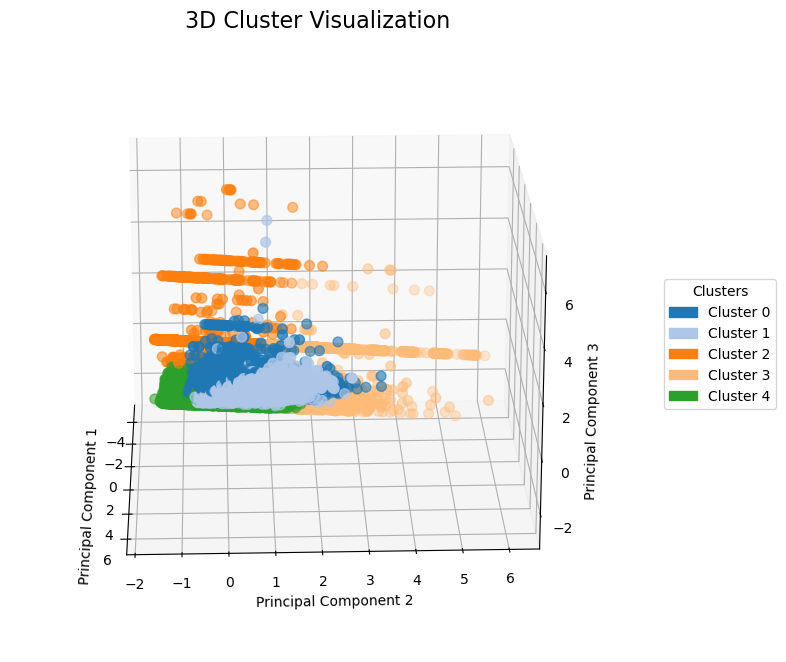

In [85]:
# Perform PCA with 3 components
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_preprocessed[features])

# Create a DataFrame with the PCA results and cluster labels
df_pca_with_labels = pd.DataFrame(df_pca, columns=["PC1", "PC2", "PC3"])
df_pca_with_labels["Cluster"] = km_labels

unique_clusters = sorted(df_pca_with_labels["Cluster"].unique()) 
cluster_to_color = {cluster: plt.cm.tab20(i) for i, cluster in enumerate(unique_clusters)}

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_pca_with_labels["PC1"], 
    df_pca_with_labels["PC2"], 
    df_pca_with_labels["PC3"], 
    c=df_pca_with_labels["Cluster"].map(cluster_to_color), 
    cmap="tab20", 
    s=50
)

legend_handles = [
    mpatches.Patch(color=cluster_to_color[cluster], label=f"Cluster {cluster}")
    for cluster in unique_clusters
]

ax.legend(
    handles=legend_handles, 
    title="Clusters", 
    loc="center left", 
    bbox_to_anchor=(1.05, 0.5), 
    fontsize=10
)

# Set titles and labels
ax.set_title("3D Cluster Visualization", fontsize=16)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Function to update the view for each frame
def update(frame):
    ax.view_init(elev=20, azim=frame)
    return scatter,

# Create the animation
anim = FuncAnimation(fig, update, frames=range(0, 360, 2), interval=50, blit=True)

# Save the animation as a GIF
anim.save('rotating_pca_clusters.gif', writer='pillow', fps=30)